In [1]:
import requests
import urllib
from bs4 import BeautifulSoup
from collections import Counter
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap


#ExportCharts
from PIL import Image
import glob
import os


In [2]:
# Variables
cm = 1/2.54  # centimeters in inches
MAX_PRICE = 150

In [3]:
lst_url =[
    "https://finance.yahoo.com/most-active/", 
    'https://www.gurufocus.com/guru/consensus-picks'
    # "https://finance.yahoo.com/u/yahoo-finance/watchlists/most-active-penny-stocks",
    # 'https://finance.yahoo.com/u/yahoo-finance/watchlists/most-active-small-cap-stocks',
    # 'https://finance.yahoo.com/u/yahoo-finance/watchlists/stocks-with-the-highest-short-interest',
    # 'https://finance.yahoo.com/u/yahoo-finance/watchlists/video-game-stocks',
    # 'https://finance.yahoo.com/u/yahoo-finance/watchlists/cash-rich-companies-stocks',
    # 'https://finance.yahoo.com/u/yahoo-finance/watchlists/most-added',
    
    ]



In [4]:
lst_Merge = []


In [5]:
# GET TICKERS FROM ALL CAPS
for link in range(len(lst_url)):
	headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:101.0) Gecko/20100101 Firefox/101.0', "cookie": "CONSENT=YES+cb.20230531-04-p0.en+FX+908"}

	response = requests.get(lst_url[link ], headers=headers )

	if response.status_code != 200:
		print("Error fetching page")
		exit()
	else:
		content = response.content
		
	soup = BeautifulSoup(response.content, 'html.parser')
	# All links in the page

	nb_links = len(soup.find_all('a'))
	print(f"There are {nb_links} links in this page")

	# GET ALL Text from the LINKS
	items = [item.text.strip() for item in soup.select('a') ]
	# for i in items:
	# 	print(i)

	#   REMOVE NON LINK TEXT
	test_list = [item.text.strip() for item in soup.select('a') ]
	# print(test_list)


	#  FILTER FOR CAPS ONLY
	for word in items:
		upperChars = True
		for letters in word:
	
			# checking for uppercase
			if not letters.isupper():
				upperChars = False
				break
		if upperChars:
			lst_Merge.append(word)
	

	# remove blanks
	lst_Merge = list(filter(None, lst_Merge))
	numCaps = len(lst_Merge)
	print(f"There are {numCaps} TICKERS in this page")


There are 98 links in this page
There are 26 TICKERS in this page
There are 415 links in this page
There are 114 TICKERS in this page


In [6]:
# REMOVE DUPLICATES

set_Merge =  set(lst_Merge)

#	Convert set to list to append 'END' below
lst_Merge = list(set_Merge)


print(f'There are {len(lst_Merge)} in List from Guru', lst_Merge)

There are 40 in List from Guru ['WBD', 'BMW', 'BALL', 'NVR', 'SOFI', 'T', 'LCID', 'ITUB', 'USA', 'INTC', 'EAT', 'LAD', 'STLA', 'UK', 'BBD', 'PBR', 'TSLA', 'F', 'NVDA', 'GOLD', 'AAPL', 'BAC', 'RGLD', 'JHG', 'MSFT', 'UBER', 'ETF', 'CMCSA', 'GT', 'TAL', 'AMZN', 'API', 'META', 'ITW', 'CCL', 'PLTR', 'NIO', 'XPEV', 'AMD', 'FAQ']


In [7]:
#   NYSE ONLY FILTER
# Append END while not END to RES_LST

tkr = '' 

def txtStripper(dcf):
    dcf = dcf.replace('\n', '')
    dcf = dcf.strip()
    print((tkr), ':',  (dcf))

lst_Merge.append('END')

#	Remove duplicates
# set_Merge =  set(lst_Merge)
# print(set_Merge)

while tkr != 'END':
    try:
        for l in lst_Merge:    
                    
                    tkr = l
                    
                    baseUrl = 'https://site.financialmodelingprep.com/discounted-cash-flow-model/{}'
                    url = baseUrl.format(str(tkr))
                    response = urllib.request.urlopen(url)
                    url_contents = response.read()

                    soup = BeautifulSoup(url_contents, "html.parser")
                    dcf = soup.find("div", {"class": "global-button2"}).text

# START CLEAN UP
                    # if 'overvalue' in dcf or  'Stock DCF: - | ' in dcf:
                    #     lst_Merge.remove(tkr)
                    if '- |' in dcf:
                       lst_Merge.remove(tkr) 
                    elif 'overvalue' in dcf:
                        lst_Merge.remove(tkr) 
                    elif dcf is None: 
                        lst_Merge.remove(tkr)
                    else:
                     txtStripper(dcf)



    except AttributeError:
        print('No' , (tkr) )
        lst_Merge.remove(tkr)
        print('Ammended tkr: ' , lst_Merge)

print('Done')
print('Appended Length: ' , len(lst_Merge))


WBD : Stock DCF: 587.93 | 9.03 | undervalue
No BMW
Ammended tkr:  ['WBD', 'BALL', 'NVR', 'SOFI', 'T', 'LCID', 'ITUB', 'USA', 'INTC', 'EAT', 'LAD', 'STLA', 'UK', 'BBD', 'PBR', 'TSLA', 'F', 'NVDA', 'GOLD', 'AAPL', 'BAC', 'RGLD', 'JHG', 'MSFT', 'UBER', 'ETF', 'CMCSA', 'GT', 'TAL', 'AMZN', 'API', 'META', 'ITW', 'CCL', 'PLTR', 'NIO', 'XPEV', 'AMD', 'FAQ', 'END']
WBD : Stock DCF: 587.93 | 9.03 | undervalue
EAT : Stock DCF: 149.24 | 32.62 | undervalue
F : Stock DCF: 29.29 | 11.47 | undervalue
No ETF
Ammended tkr:  ['WBD', 'NVR', 'T', 'ITUB', 'INTC', 'EAT', 'STLA', 'BBD', 'TSLA', 'F', 'GOLD', 'BAC', 'JHG', 'UBER', 'CMCSA', 'GT', 'TAL', 'AMZN', 'API', 'META', 'ITW', 'CCL', 'PLTR', 'NIO', 'XPEV', 'AMD', 'FAQ', 'END']
WBD : Stock DCF: 587.93 | 9.03 | undervalue
NVR : Stock DCF: 6,161.85 | 4635.55 | undervalue
T : Stock DCF: 182.94 | 18.07 | undervalue
ITUB : Stock DCF: 155.45 | 4.72 | undervalue
INTC : Stock DCF: 107.52 | 26.44 | undervalue
EAT : Stock DCF: 149.24 | 32.62 | undervalue
STLA : Stoc

In [8]:
lst_Merge

['WBD',
 'NVR',
 'T',
 'ITUB',
 'INTC',
 'EAT',
 'STLA',
 'BBD',
 'F',
 'GOLD',
 'BAC',
 'JHG',
 'CMCSA',
 'META']

In [9]:
mergedTkrs = ''

overVal = []
underVal = []
nanList = []

dict_CurrentPrice = {}
dict_Valuation = {}
dict_Discount = {}
dict_UnderBy = {}

# tkr, $, evaluation
#lst_Comparison = []

In [10]:
# DEF:   remove newline and spaces
def txtValueFilter(dcf):
    dcf = dcf.replace('\n', '')
    dcf = dcf.replace(',', '')
    dcf = dcf.strip()

    if dcf is None:
        lst_Merge.remove(mergedTkrs)

    if 'Stock DCF: - | ' in dcf: # NAN values in ticker price. instead of try: block
        nanList.append(mergedTkrs)

    # elif 'overvalue' in dcf:
    #     overVal.append(mergedTkrs) # append to list
        
        
    elif 'undervalue' in dcf:
         underVal.append(mergedTkrs) # append to list
         
         EvaluateDCF(dcf)
               
    else:
        print('No Value Statement: code Throw')

    print(mergedTkrs, ':',  (dcf))



In [11]:
#   DEF CALCULATE VALUE DIFFERENCE

def EvaluateDCF(tstStr):
    tstStr = tstStr.replace('Stock DCF:', '')
    tstStr = tstStr.replace('|', '-', 1)
    tstStr = tstStr.replace('|', '')
    tstStr = tstStr.replace('overvalue', '')
    tstStr = tstStr.replace('undervalue', '')
    
    tstStr = tstStr.split('-')

    eval = float(tstStr[0]) - float(tstStr[1])
    eval = (round(eval, 2))

    currentPrice =  float(tstStr[0])
    valuation = float(tstStr[1])
    valuation = round(valuation,2)
    discount = currentPrice - valuation
    discount = round(discount,2)
    underBy = round((valuation / currentPrice) * 100, 2)

    dict_CurrentPrice.update( {mergedTkrs : tstStr[0]})
    dict_Valuation.update({mergedTkrs : discount})      #NB discount/valuation SWAP
    dict_Discount.update({mergedTkrs : valuation})
    dict_UnderBy.update({mergedTkrs : underBy})

    #lst_Comparison.append(mergedTkrs, currentPrice, eval )
    
    print (mergedTkrs, 'Undervalued by: $', valuation)


In [12]:
#   CALC LOOP

for mergedTkrs in lst_Merge:
    try:
        baseUrl = 'https://site.financialmodelingprep.com/discounted-cash-flow-model/{}'
        url = baseUrl.format(str(mergedTkrs))
        response = urllib.request.urlopen(url)
        url_contents = response.read()

        soup = BeautifulSoup(url_contents, "html.parser")
        dcf = soup.find("div", {"class": "global-button2"}).text

        print('error checker: ',mergedTkrs, dcf)

        txtValueFilter(dcf) 
    
    except AttributeError:
        print('No text for ' , (mergedTkrs) )
        lst_Merge.remove(mergedTkrs)

    except KeyError: 'END'

print('CALC DONE. ')



error checker:  WBD 
                Stock DCF: 587.93 | 9.03 | undervalue
            
WBD Undervalued by: $ 9.03
WBD : Stock DCF: 587.93 | 9.03 | undervalue
error checker:  NVR 
                Stock DCF: 6,161.85 | 4635.55 | undervalue
            
NVR Undervalued by: $ 4635.55
NVR : Stock DCF: 6161.85 | 4635.55 | undervalue
error checker:  T 
                Stock DCF: 182.94 | 18.07 | undervalue
            
T Undervalued by: $ 18.07
T : Stock DCF: 182.94 | 18.07 | undervalue
error checker:  ITUB 
                Stock DCF: 155.45 | 4.72 | undervalue
            
ITUB Undervalued by: $ 4.72
ITUB : Stock DCF: 155.45 | 4.72 | undervalue
error checker:  INTC 
                Stock DCF: 107.52 | 26.44 | undervalue
            
INTC Undervalued by: $ 26.44
INTC : Stock DCF: 107.52 | 26.44 | undervalue
error checker:  EAT 
                Stock DCF: 149.24 | 32.62 | undervalue
            
EAT Undervalued by: $ 32.62
EAT : Stock DCF: 149.24 | 32.62 | undervalue
error checker:  STLA 
   

In [13]:
dict_UnderBy

{'WBD': 1.54,
 'NVR': 75.23,
 'T': 9.88,
 'ITUB': 3.04,
 'INTC': 24.59,
 'EAT': 21.86,
 'STLA': 3.58,
 'BBD': 3.06,
 'F': 39.16,
 'GOLD': 6.2,
 'BAC': 26.52,
 'JHG': 33.03,
 'CMCSA': 29.95,
 'META': 31.59}

In [14]:
underVal


['WBD',
 'NVR',
 'T',
 'ITUB',
 'INTC',
 'EAT',
 'STLA',
 'BBD',
 'F',
 'GOLD',
 'BAC',
 'JHG',
 'CMCSA',
 'META']

In [15]:

dict_CurrentPrice

{'WBD': ' 587.93 ',
 'NVR': ' 6161.85 ',
 'T': ' 182.94 ',
 'ITUB': ' 155.45 ',
 'INTC': ' 107.52 ',
 'EAT': ' 149.24 ',
 'STLA': ' 393.16 ',
 'BBD': ' 91.90 ',
 'F': ' 29.29 ',
 'GOLD': ' 278.72 ',
 'BAC': ' 121.39 ',
 'JHG': ' 73.15 ',
 'CMCSA': ' 114.91 ',
 'META': ' 370.63 '}

In [16]:
# v = dict_Valuation.values()
# float([x for x in v][0])
dict_Valuation
# round(dict_Valuation.values,2)

{'WBD': 578.9,
 'NVR': 1526.3,
 'T': 164.87,
 'ITUB': 150.73,
 'INTC': 81.08,
 'EAT': 116.62,
 'STLA': 379.09,
 'BBD': 89.09,
 'F': 17.82,
 'GOLD': 261.44,
 'BAC': 89.2,
 'JHG': 48.99,
 'CMCSA': 80.5,
 'META': 253.54}

In [17]:

dict_Discount

{'WBD': 9.03,
 'NVR': 4635.55,
 'T': 18.07,
 'ITUB': 4.72,
 'INTC': 26.44,
 'EAT': 32.62,
 'STLA': 14.07,
 'BBD': 2.81,
 'F': 11.47,
 'GOLD': 17.28,
 'BAC': 32.19,
 'JHG': 24.16,
 'CMCSA': 34.41,
 'META': 117.09}

In [18]:
df_Value = pd.DataFrame([dict_CurrentPrice, dict_Valuation, dict_Discount, dict_UnderBy]).T
df_Value.columns = ['Price', 'Value', 'Discount', '% Under']
df_Value = df_Value.sort_values(by=['% Under'], ascending=False ) # 
df_Value_Full = df_Value
df_Value_Full

,Price,Value,Discount,% Under
NVR,6161.85,1526.3,4635.55,75.23
F,29.29,17.82,11.47,39.16
JHG,73.15,48.99,24.16,33.03
META,370.63,253.54,117.09,31.59
CMCSA,114.91,80.5,34.41,29.95
BAC,121.39,89.2,32.19,26.52
INTC,107.52,81.08,26.44,24.59
EAT,149.24,116.62,32.62,21.86
T,182.94,164.87,18.07,9.88
GOLD,278.72,261.44,17.28,6.2


# Price Filter

In [19]:
%store df_Value_Full
%store df_Value_Cheapest

Stored 'df_Value_Full' (DataFrame)


UsageError: Unknown variable 'df_Value_Cheapest'


In [20]:
df_Value = df_Value.astype(float)

In [21]:
df_Value.dtypes

Price       float64
Value       float64
Discount    float64
% Under     float64
dtype: object

In [22]:
#   DROP EXPENSIVE STOCKS

# Get names of indexes for  column to manipulate
indxNames = df_Value[df_Value['Price'] > MAX_PRICE].index
# Delete these row indexes from dataFrame with column values >x.
df_Value_Cheapest = df_Value.drop(indxNames , inplace=True)


In [38]:
df_Value_Cheapest = df_Value
%store df_Value_Cheapest
df_Value_Cheapest

Stored 'df_Value_Cheapest' (DataFrame)


,Price,Value,Discount,% Under
F,29.29,17.82,11.47,39.16
JHG,73.15,48.99,24.16,33.03
CMCSA,114.91,80.50,34.41,29.95
BAC,121.39,89.20,32.19,26.52
INTC,107.52,81.08,26.44,24.59
EAT,149.24,116.62,32.62,21.86
BBD,91.90,89.09,2.81,3.06


# HTML    

### JINJA2 PRETTY HYBRID

In [24]:
import jinja2
from pretty_html_table import build_table


In [28]:

# Getting current date and time using now().
 
# importing datetime module for now()
import datetime
 
# using now() to get current time
current_time = datetime.datetime.now().replace(microsecond=0)
 
# Printing value of now.
print("Report generated at:", current_time)

Report generated at: 2022-12-21 13:52:16


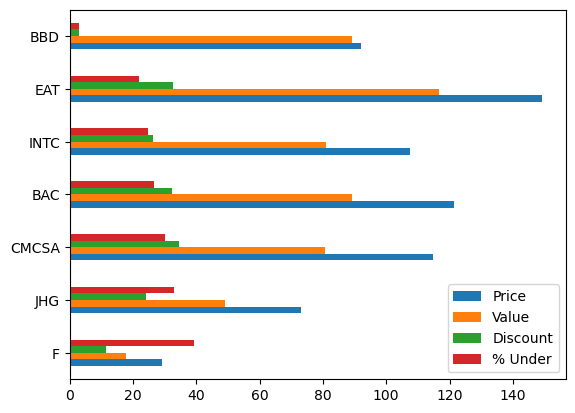

In [42]:
# Template handling
env = jinja2.Environment(loader=jinja2.FileSystemLoader(searchpath=''))
template = env.get_template('template.html')

tbl_Full = build_table(df_Value_Full, 'blue_light',
                        padding="10",
                        index=True,)

tbl_Cheap = build_table(df_Value_Cheapest, 'blue_light',
                        padding="10",
                        index=True,
                        border_bottom_color='black',
                        even_color='green')   

# tbl_cheap =  html_table_Cheap 
tmpl_time = current_time
max_P = MAX_PRICE

html = template.render(tmpl_tbl_cheap = tbl_Cheap , tmpl_tbl_full = tbl_Full, 
                        tmpl_time = current_time, max_P = MAX_PRICE)

# Plot
ax = df_Value_Cheapest.plot.barh()
fig = ax.get_figure()
fig.savefig('IMG\\CheapUnderBarh.svg')


# Save to html file
with open('pretty_table03.html', 'w') as f:
    f.write(html)

# TEST

In [ ]:
df_html = df_Value_Full
df_html


In [ ]:
df_html_tail = df_html.tail()
df_html_tail

In [ ]:

html = df_html.to_html(border=10, )
  
# write html to file
text_file = open("index01.html", "w")
text_file.write(html)
text_file.close()

In [ ]:
from pretty_html_table import build_table


html_table_blue_light = build_table(df_html, 'blue_light',
                        padding="10",
                        index=True,)

                    

# Plot
ax = df_html.plot.bar()
fig = ax.get_figure()
fig.savefig('plot.svg')

# Save to html file
with open('pretty_table.html', 'w') as f:
    f.write(html_table_blue_light, html_B)



In [ ]:
#   |||     JIN PRETTY HYBRID BACKUP    |||

# Template handling
env = jinja2.Environment(loader=jinja2.FileSystemLoader(searchpath=''))
template = env.get_template('template.html')

html_table_blue_light = build_table(df_Value_Full, 'blue_light',
                        padding="10",
                        index=True,)

html_B = build_table(df_Value_Cheapest, 'blue_light',
                        padding="10",
                        index=True,
                        border_bottom_color='black',
                        even_color='green')   

twin_table =  html_B + html_table_blue_light 

html = template.render(my_table = twin_table , my_2nd_table = html_B)

# Plot
ax = df_Value_Cheapest.plot.bar()
fig = ax.get_figure()
fig.savefig('plot.svg')


# Save to html file
with open('pretty_table03.html', 'w') as f:
    f.write(html)

### Jinja2

In [ ]:
    {{my_table_B}}
    {{my_table}}

In [ ]:
import jinja2

In [ ]:
df_Value_Full.iloc[3]['Value']

In [ ]:
df = df_Value_Full
type(df)

In [ ]:


# See: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Building-styles

styler = df.style

# Template handling
env = jinja2.Environment(loader=jinja2.FileSystemLoader(searchpath=''))
template = env.get_template('template.html')
html = template.render(my_table = styler.to_html())


# Plot
ax = df.plot.bar()
fig = ax.get_figure()
fig.savefig('plot.svg')


df.to_html()


# Write the HTML file
with open('report.html', 'w') as f:
    f.write(html)

#   Charts  
*   Valuations

In [ ]:
mpl.rcParams['savefig.pad_inches'] = 0

In [ ]:
fig, ax =plt.subplots() # figsize=(5,3)
ax.margins(0,0)
# ax.axis('tight')
ax.axis('off')
ax.set_title(f"DCF Valuation < ${MAX_PRICE} ", loc='left',  fontsize=16, weight='bold', y=0.8) # pad='2.0',

tbl_Value = ax.table(rowLabels=df_Value.index,
                        rowColours=["azure"] * 16,
                        colColours=["palegreen"] * 16,
                        cellText=df_Value.values,
                        cellLoc="center",
                        loc='center',
                        colLabels=df_Value.columns,
                        )

tbl_Value.scale(1,1)  

plt.savefig('ReportDCF\\tbl_Val_Cheap.png', dpi=300)
# fig.savefig('ReportDCF\\tbl_Val_Cheap.svg')

### start from here

In [ ]:
sumV = df_Value['Value'].sum()
float(sumV)
round(sumV,2)

In [ ]:
#df_Value['Value'].round(2)

In [ ]:
89.795 in df_Value is float

In [ ]:
dfN = df_Value[df_Value['Price'] > 150]

In [ ]:
df_Value.plot(figsize=      (10,6))

In [ ]:
fig, ax =plt.subplots() # figsize=(5,3) figsize=(15*cm,20*cm)
# plt.autoscale(tight=True)
ax.margins(0,0)
# ax.axis('tight')
ax.axis('off')
ax.set_title("DCF Valuation", loc='left',  fontsize=16, weight='bold', y=1) # pad='2.0',

tbl_Value = ax.table(rowLabels=df_Value.index,
                        rowColours=["azure"] * 16,
                        colColours=["palegreen"] * 16,
                        cellText=df_Value.values,
                        cellLoc="center",
                        loc='center',
                        colLabels=df_Value.columns,
                        )

tbl_Value.scale(1,1.5)    

plt.savefig('ReportDCF\\tbl_Val_Full.png')